In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import kelbow_visualizer
from sklearn.metrics import silhouette_score

In [75]:
# Load the credit card dataset
credit_card_df = pd.read_csv("CC GENERAL.csv")

In [76]:
# Data Cleaning
credit_card_df.drop("CUST_ID", axis=1, inplace=True)
credit_card_df.dropna(inplace=True)

In [77]:
# Data Exploration
print(credit_card_df.describe())
print(credit_card_df.info())

            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8636.000000        8636.000000   8636.000000       8636.000000   
mean    1601.224893           0.895035   1025.433874        604.901438   
std     2095.571300           0.207697   2167.107984       1684.307803   
min        0.000000           0.000000      0.000000          0.000000   
25%      148.095189           0.909091     43.367500          0.000000   
50%      916.855459           1.000000    375.405000         44.995000   
75%     2105.195853           1.000000   1145.980000        599.100000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8636.000000   8636.000000          8636.000000   
mean               420.843533    994.175523             0.496000   
std                917.245182   2121.458303             0.401273   
min                  0.000000      0.000000             0.000

In [81]:
# Data Visualization
sns.set(style="whitegrid")
plt.figure(figsize=(15, 15))


<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

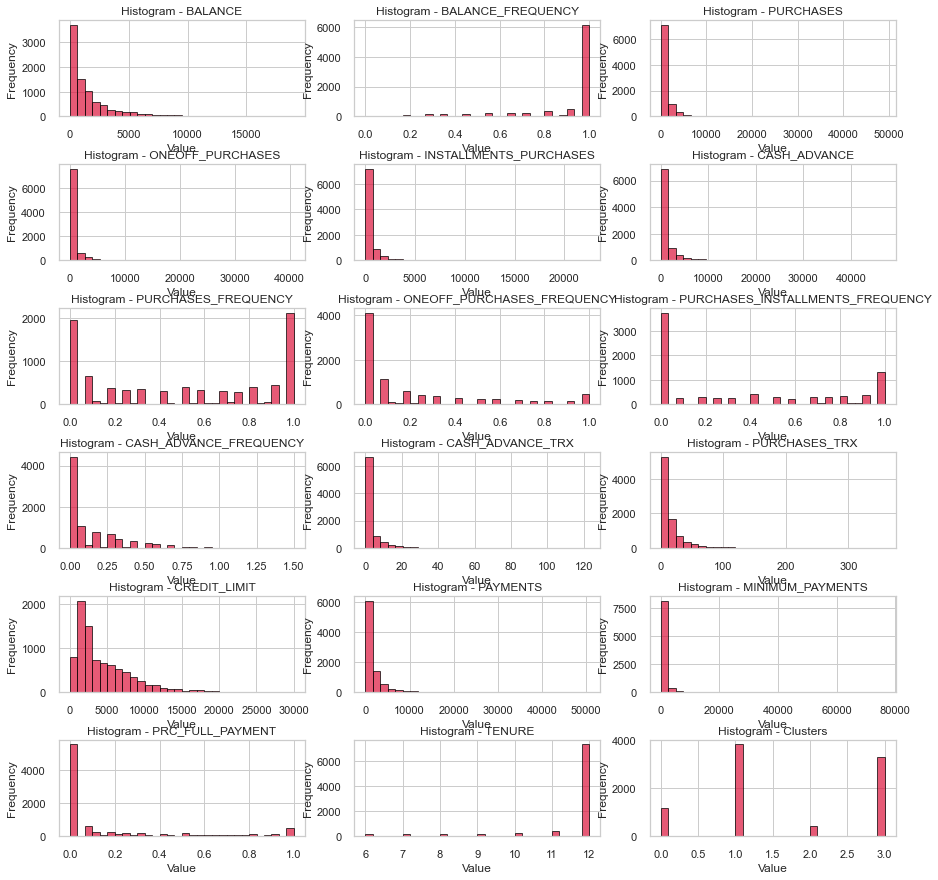

In [104]:

# Set up subplots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot histograms for each feature
for i, (col, ax) in enumerate(zip(creditcard_df.columns, axes), 1):
    ax.hist(creditcard_df[col], bins=30, color='#DC143C', edgecolor='black', alpha=0.7)
    ax.set_title(f'Histogram - {col}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Hide any remaining empty subplots
for i in range(len(creditcard_df.columns), len(axes)):
    axes[i].axis('off')

plt.show()

In [91]:
# Feature Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(credit_card_df)


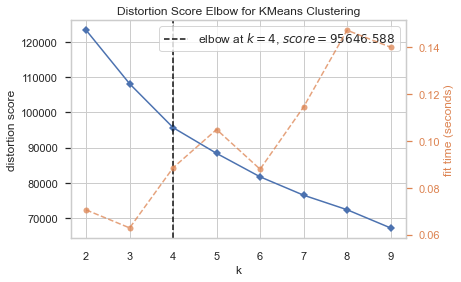

In [92]:

# K-Means Clustering
kelbow_visualizer(KMeans(random_state=4), df_scaled, k=(2, 10))

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=123)
scaled_labels = kmeans.fit_predict(df_scaled)


In [93]:

# Cluster Analysis
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=credit_card_df.columns)
credit_card_df["Clusters"] = pd.Categorical(scaled_labels)


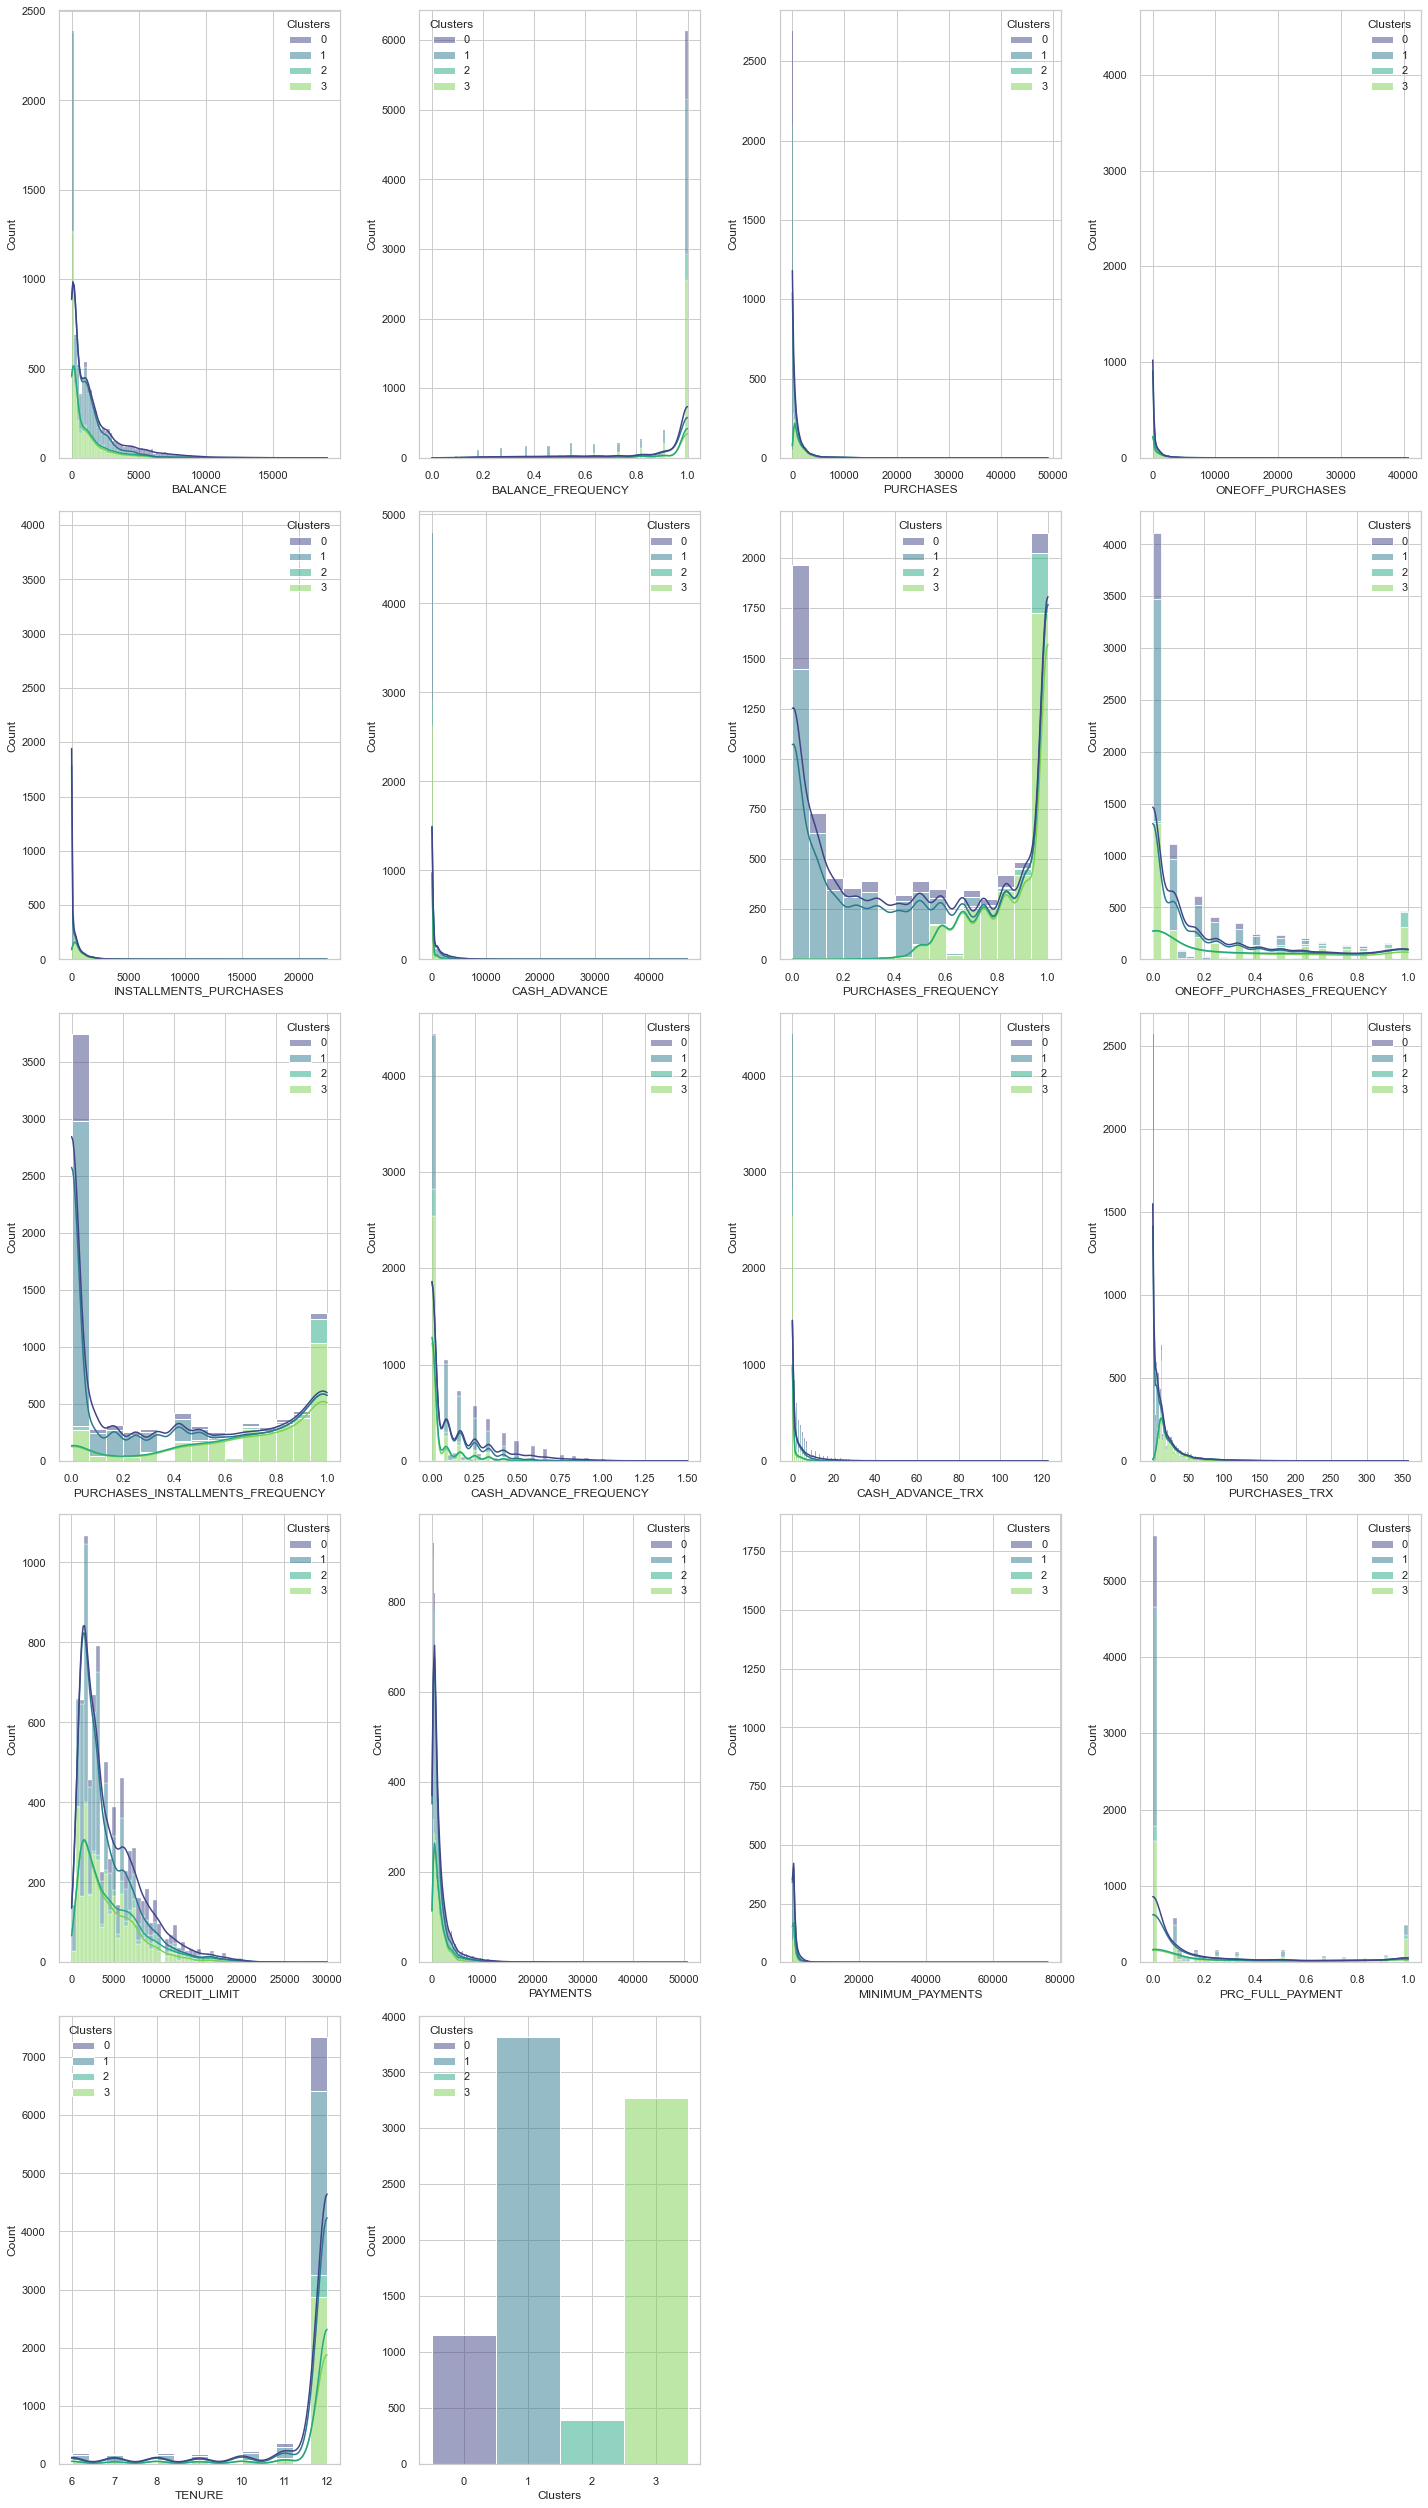

In [95]:

# Visualize Clusters
plt.figure(figsize=(20, 35))
for i, col in enumerate(credit_card_df.columns, 1):
    plt.subplot(5, 4, i)
    sns.histplot(data=credit_card_df, x=col, hue="Clusters", multiple="stack", kde=True, palette="viridis")

plt.tight_layout()
plt.show()


In [ ]:

# Analyze Clusters
cluster_analysis = credit_card_df.groupby("Clusters").mean().transpose()
print(cluster_analysis)
